## 9-7. 프로젝트 : 인물 모드 문제점 찾기

### Step 1. 인물모드 직접 해 보기


In [1]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

print('슝=3')

슝=3


(960, 540, 3)
(960, 540, 3)
(960, 540, 3)
(5546, 3961, 3)


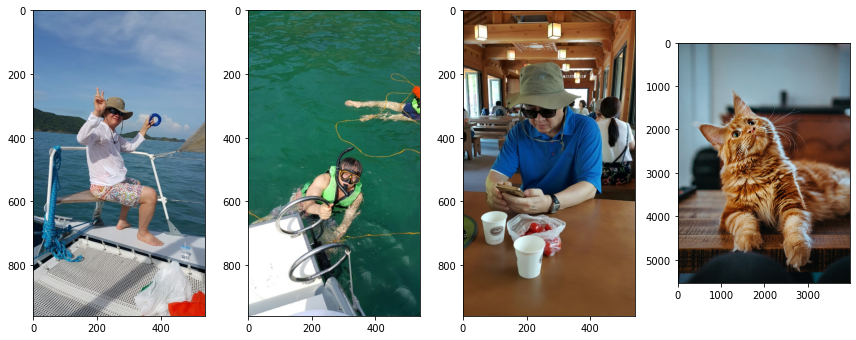

In [2]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/myimg1.jpg' #my_image.png'  
img_path2 = os.getenv('HOME')+'/aiffel/human_segmentation/images/myimg2.jpg'
img_path3 = os.getenv('HOME')+'/aiffel/human_segmentation/images/myimg3.jpg'
img_path4 = os.getenv('HOME')+'/aiffel/human_segmentation/images/Unsplash_고양이2.jpg'

img_orig = cv2.imread(img_path) 
img_orig2 = cv2.imread(img_path2) 
img_orig3 = cv2.imread(img_path3) 
img_orig4 = cv2.imread(img_path4) 

print(img_orig.shape)
print(img_orig2.shape)
print(img_orig3.shape)
print(img_orig4.shape)

# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 이미지 색상 채널을 변경 (BGR 형식을 RGB 형식으로 변경)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시, 입력은 RGB(A) 데이터 혹은 2D 스칼라 데이터
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
# plt.show(): 현재 열려있는 모든 figure를 표시 (여기서 figure는 이미지, 그래프 등)
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html

plt.figure(figsize=(12, 8)) 
plt.subplot(1,4,1)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))

plt.subplot(1,4,2)
plt.imshow(cv2.cvtColor(img_orig2, cv2.COLOR_BGR2RGB))

plt.subplot(1,4,3)
plt.imshow(cv2.cvtColor(img_orig3, cv2.COLOR_BGR2RGB))

plt.subplot(1,4,4)
plt.imshow(cv2.cvtColor(img_orig4, cv2.COLOR_BGR2RGB))
plt.tight_layout()
plt.show()

In [3]:
# 1
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
# 2
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file) # urllib 패키지 내에 있는 request 모듈의 urlretrieve 함수를 이용해서 model_url에 있는 파일을 다운로드 해서 model_file 파일명으로 저장

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f0c9ab668b0>)

In [4]:
model = semantic_segmentation() #PixelLib 라이브러리 에서 가져온 클래스를 가져와서 semantic segmentation을 수행하는 클래스 인스턴스를 만듬
model.load_pascalvoc_model(model_file) # pascal voc에 대해 훈련된 예외 모델(model_file)을 로드하는 함수를 호출

In [5]:
segvalues, output = model.segmentAsPascalvoc(img_path) # segmentAsPascalvoc()함 수 를 호출 하여 입력된 이미지를 분할, 분할 출력의 배열을 가져옴, 분할 은 pacalvoc 데이터로 학습된 모델을 이용
segvalues2, output2 = model.segmentAsPascalvoc(img_path2)
segvalues3, output3 = model.segmentAsPascalvoc(img_path3)
segvalues4, output4 = model.segmentAsPascalvoc(img_path4)


In [8]:
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

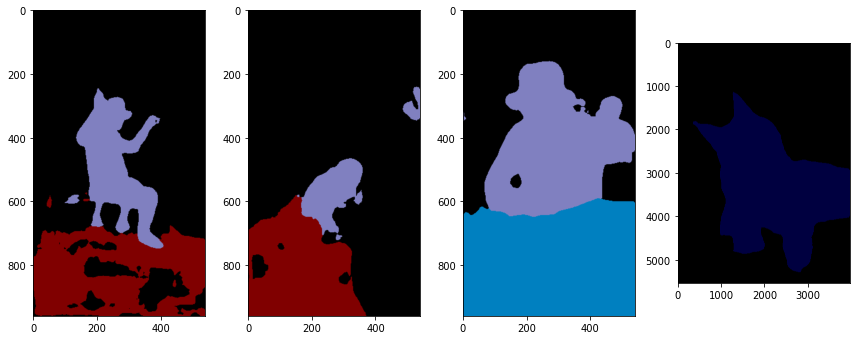

In [9]:
#segmentAsPascalvoc() 함수 를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 output을 matplotlib을 이용해 출력
plt.figure(figsize=(12,8)) 
plt.subplot(1,4,1)
plt.imshow(output)

plt.subplot(1,4,2)
plt.imshow(output2)

plt.subplot(1,4,3)
plt.imshow(output3)

plt.subplot(1,4,4)
plt.imshow(output4)

plt.tight_layout()
plt.show()

In [10]:
print("segvalues: ",segvalues) # segmentAsPascalvoc() 함수를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 배열값을 출력
print("segvalues2: ",segvalues2)
print("segvalues3: ",segvalues3)
print("segvalues4: ",segvalues4)


segvalues:  {'class_ids': array([ 0,  4, 15]), 'masks': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True]])}
segvalues2:  {'class_ids': array([ 0,  4, 15]), 'masks': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])}
segvalues3:  {'class_ids': array([ 0, 11, 15]), 'masks': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fal

In [11]:
#segvalues에 있는 class_ids를 담겨있는 값을 통해 pacalvoc에 담겨있는 라벨을 출력

# 식별 인덱스 및 식별부분
# segvalues['class_ids']: array([ 0,  4, 15] == 'background', 'boat', 'person'
# segvalues2['class_ids']: array([ 0,  4, 15] == 'background', 'boat', 'person'
# segvalues3['class_ids']: array([ 0,  11, 15] == 'background', 'diningtable', 'person'
# segvalues4['class_ids']: array([ 0,  8] == 'background', 'cat'

for i, seg_class_id in enumerate([segvalues['class_ids'],segvalues2['class_ids'],segvalues3['class_ids'],segvalues4['class_ids']]):
    print("i",i)
    for class_id in seg_class_id: #segvalues['class_ids']:
        print(LABEL_NAMES[class_id])

i 0
background
boat
person
i 1
background
boat
person
i 2
background
diningtable
person
i 3
background
cat


In [12]:
#컬러맵 만들기 
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20] #생성한 20개의 컬러맵 출력

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [13]:
## 사람 색상
colormap[15] #컬러맵 15에 해당하는 배열 출력 (pacalvoc에 LABEL_NAMES 15번째인 사람)

array([192, 128, 128])

In [14]:
## 사람 색상순서 변경
seg_color = (128,128,192) # 색상순서 변경 - colormap의 배열은 RGB 순이며 output의 배열은 BGR 순서로 채널 배치가 되어 있어서

In [15]:
## 고양이 색상
colormap[8] #컬러맵 8에 해당하는 배열 출력 (pacalvoc에 LABEL_NAMES 8번째인 고양이)

array([64,  0,  0])

In [16]:
## 고양이 색상순서 변경
seg_color_cat = (0,0,64) # 색상순서 변경

(960, 540)
(960, 540)
(960, 540)
(5546, 3961)


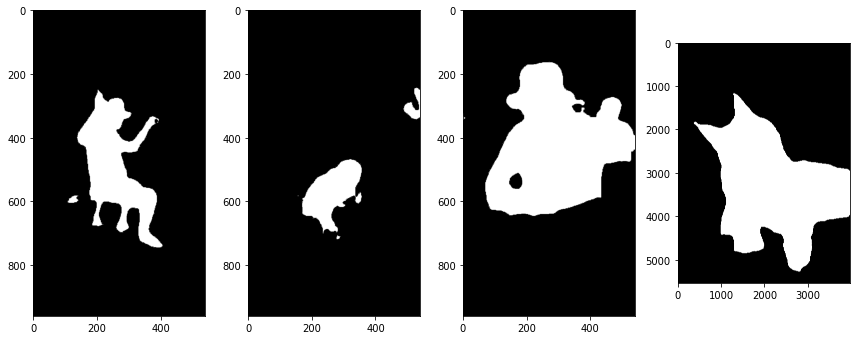

In [17]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
# seg_color 값이 person을 값이 므로 사람이 있는 위치를 제외하고는 gray로 출력
# cmap 값을 변경하면 다른 색상으로 확인이 가능함

seg_map = np.all(output==seg_color, axis=-1) 
seg_map2 = np.all(output2==seg_color, axis=-1)
seg_map3 = np.all(output3==seg_color, axis=-1)
seg_map4 = np.all(output4==seg_color_cat, axis=-1)

plt.figure(figsize=(12, 8)) 
print(seg_map.shape) 
plt.subplot(1,4,1)
plt.imshow(seg_map, cmap='gray')

print(seg_map2.shape) 
plt.subplot(1,4,2)
plt.imshow(seg_map2, cmap='gray')

print(seg_map3.shape) 
plt.subplot(1,4,3)
plt.imshow(seg_map3, cmap='gray')

print(seg_map4.shape) 
plt.subplot(1,4,4)
plt.imshow(seg_map4, cmap='gray')

plt.tight_layout()
plt.show()


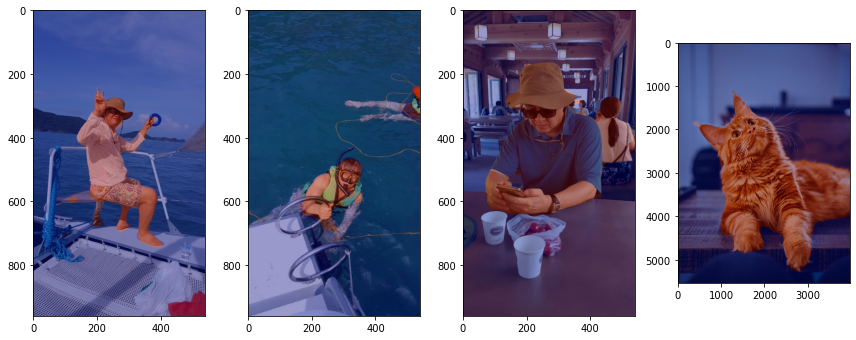

In [18]:
# 원본이미지를 img_show에 할당한뒤 이미지 사람과 고양이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
img_show = img_orig.copy()
img_show2 = img_orig2.copy()
img_show3 = img_orig3.copy()
img_show4 = img_orig4.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255
img_mask2 = seg_map2.astype(np.uint8) * 255
img_mask3 = seg_map3.astype(np.uint8) * 255
img_mask4 = seg_map4.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
color_mask2 = cv2.applyColorMap(img_mask2, cv2.COLORMAP_JET)
color_mask3 = cv2.applyColorMap(img_mask3, cv2.COLORMAP_JET)
color_mask4 = cv2.applyColorMap(img_mask4, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)
img_show2 = cv2.addWeighted(img_show2, 0.6, color_mask2, 0.4, 0.0)
img_show3 = cv2.addWeighted(img_show3, 0.6, color_mask3, 0.4, 0.0)
img_show4 = cv2.addWeighted(img_show4, 0.6, color_mask4, 0.4, 0.0)

plt.figure(figsize=(12, 8)) 
plt.subplot(1,4,1)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))

plt.subplot(1,4,2)
plt.imshow(cv2.cvtColor(img_show2, cv2.COLOR_BGR2RGB))

plt.subplot(1,4,3)
plt.imshow(cv2.cvtColor(img_show3, cv2.COLOR_BGR2RGB))

plt.subplot(1,4,4)
plt.imshow(cv2.cvtColor(img_show4, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()

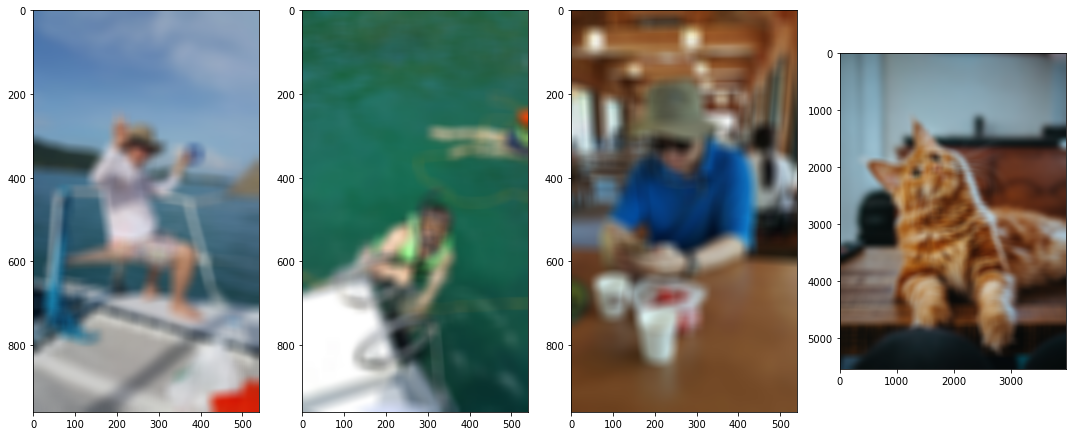

In [20]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요

img_orig_blur = cv2.blur(img_orig, (30,30))      
img_orig_blur2 = cv2.blur(img_orig2, (30,30)) 
img_orig_blur3 = cv2.blur(img_orig3, (30,30)) 
img_orig_blur4 = cv2.blur(img_orig4, (130,130))   # 고양이는 130정도돼야 사람 30정도와 비슷한 blur처리 가능

# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)   

plt.figure(figsize=(15, 12)) 
plt.subplot(1,4,1)
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))

plt.subplot(1,4,2)
plt.imshow(cv2.cvtColor(img_orig_blur2, cv2.COLOR_BGR2RGB))

plt.subplot(1,4,3)
plt.imshow(cv2.cvtColor(img_orig_blur3, cv2.COLOR_BGR2RGB))

plt.subplot(1,4,4)
plt.imshow(cv2.cvtColor(img_orig_blur4, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()

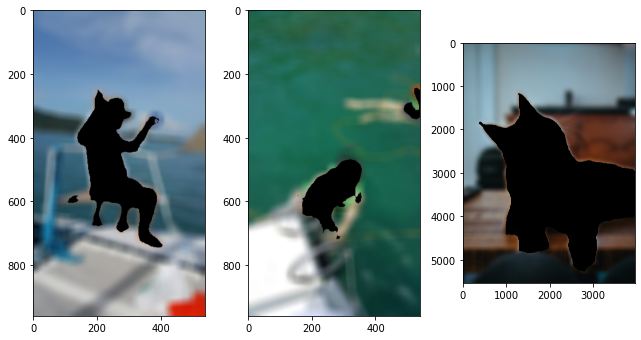

In [21]:
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경) 

img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_mask_color2 = cv2.cvtColor(img_mask2, cv2.COLOR_GRAY2BGR)
img_mask_color3 = cv2.cvtColor(img_mask3, cv2.COLOR_GRAY2BGR)
img_mask_color4 = cv2.cvtColor(img_mask4, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나
# 연산을 하고 나면 배경은 255 사람은 0입니다.

img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_mask2 = cv2.bitwise_not(img_mask_color2)
img_bg_mask3 = cv2.bitwise_not(img_mask_color3)
img_bg_mask4 = cv2.bitwise_not(img_mask_color4)

# cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
# 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
# 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지고 배경만 남아요!

img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
img_bg_blur2 = cv2.bitwise_and(img_orig_blur2, img_bg_mask2)
img_bg_blur3 = cv2.bitwise_and(img_orig_blur3, img_bg_mask3)
img_bg_blur4 = cv2.bitwise_and(img_orig_blur4, img_bg_mask4)

plt.figure(figsize=(12,8)) 
plt.subplot(1,4,1)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))

plt.subplot(1,4,2)
plt.imshow(cv2.cvtColor(img_bg_blur2, cv2.COLOR_BGR2RGB))

plt.subplot(1,4,3)
plt.imshow(cv2.cvtColor(img_bg_blur3, cv2.COLOR_BGR2RGB))

plt.subplot(1,4,3)
plt.imshow(cv2.cvtColor(img_bg_blur4, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()

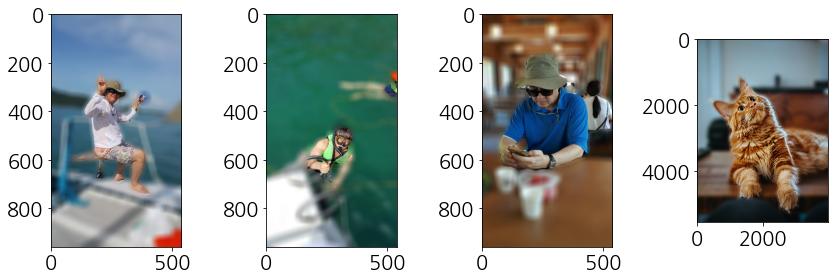

In [55]:
# np.where(조건, 참일때, 거짓일때)
# 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 
# 아닌 영역은 블러된 이미지 값을 사용합니다.

img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
img_concat2 = np.where(img_mask_color2==255, img_orig2, img_bg_blur2)
img_concat3 = np.where(img_mask_color3==255, img_orig3, img_bg_blur3)
img_concat4 = np.where(img_mask_color4==255, img_orig4, img_bg_blur4)

# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)

plt.figure(figsize=(12,8)) 

plt.subplot(1,4,1)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))

plt.subplot(1,4,2)
plt.imshow(cv2.cvtColor(img_concat2, cv2.COLOR_BGR2RGB))

plt.subplot(1,4,3)
plt.imshow(cv2.cvtColor(img_concat3, cv2.COLOR_BGR2RGB))

plt.subplot(1,4,4)
plt.imshow(cv2.cvtColor(img_concat4, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()

##### 문제있는 부분 표시 사진 : 1번사진

['NanumGothic']


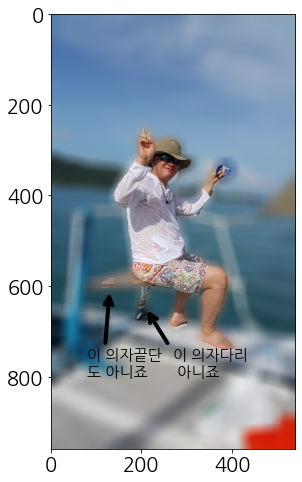

In [56]:
## 한글 설정
plt.rc('font',family='NanumGothic', size = 20)
print(plt.rcParams['font.family'])

## 문제부분 텍스트와 화살표로 표시
plt.figure(figsize=(12,8)) 

plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.annotate('', xytext=(260, 730), xy=(210, 650), xycoords='data', arrowprops=dict(arrowstyle='->', color='black', lw=4))
plt.text(270, 800, '이 의자다리\n 아니죠',color='black', size =15)
plt.annotate('', xytext=(120, 730), xy=(130, 610), xycoords='data', arrowprops=dict(arrowstyle='->', color='black', lw=4))
plt.text(80, 800, '이 의자끝단\n도 아니죠',color='black', size =15)
plt.show()

### Step 2. 사진에서 문제점 찾기
그러나 여러분들의 사진에는 무언가 문제점이 있을 것입니다.

아래 사진에도 문제점이 몇 가지 있었습니다. 예를 들어 뒤에 걸린 옷이 인물 영역에 포함되어 blur되지 않고 나온다던가 하는 경우입니다. ㅠㅠ 그 외 다른 문제들이 눈에 띄시나요? 아래 사진에는 이상한 점이 최소 2개 이상 더 있습니다. 어떤 문제가 있는지 찾아서 아래 사진처럼 표시해 봅시다.

추가로 여러분이 만들어 낸 인물 모드 사진 중 하나에서도 이상한 위치를 찾아 아래 사진처럼 표시해 봅시다. 표시한 이미지들을 jupyter notebook에 포함하여 제출해 주세요.

### << 사진내의 문제점 >>

##### (1). 1번사진: 2군데가  pascalvoc 데이터의 라벨종류(LABEL_NAMES)내의  ' boat'로나, 'back groung' 로 인식되지 않아서, blur처리가 않되었슴, 이는  사람과 가까이 있으면서,  색깔(color)이 유사한 다른 사물이나  배경이 있을때, DeepLab model의 semantic segmentation 기법의  학습이 잘않되는 것으로 보임

#####    - 앉아있는 의자의 다리 하나
#####    - 의자 앉은판의 왼쪽끝부분 일부분
    
##### (2). 2번 사진: 뒤쪽에서 수영하고 있는 구명조끼입은 사람은 blur처리되지 않됐으나, 이 프로젝트에 적용된 기법은 DeepLab model의 semantic segmentation 기법으로서, 사람은 모두 식별하는 모델로서, 개별 사람까지 식별하는 instance segmentation이 아니라서,semantic segmentation 기법상의 문제점은 아님

##### (3). 3번사진: 뒷테이블에 앉아있는 흰셔츠 긴머리 여성의 모습이 blur처리되지 않았으나, 이것도 역시,  semantic segmentation으로서,  개별 사람까지 식별하는 instance segmentation이 아니라서, semantic segmentation 기법상의 문제점은 아님

##### (4). 4번사진:  고양이는 별다른 이상치는 않보임


### Step 3. 해결 방법을 제안해 보기


### << 제안>>

#### << 문제점 검토>>
##### (1). DeepLab 모델의 Semantic Segmentation mask의 인체 Boundary box 및 인체 주요부위(팔다리등)keypoint detector  못하는 문제:

사람얼굴 인식상의 HOG(Histogram of Oriented Gradients)와 SVM처럼 얼굴의 Boundary Box와 핵심keypoint detector로 (눈, 코, 입등)을 정교하게 인식하는 기능 설계가, "사람 전체 신체" 탐지에는 설계상, 기능상 부족한 것이 아닌가 생각됨, 즉 사람이 팔이 두개고, 다리도 두개인데, 의자 다리가 사람몸 아래에 있고, 색깔이 비슷하다고, 사람의 일부로 인식한다는 것은 학습이 모자라거나, target data의 label 지정시, multi_label등의 방법으로 사람 다리수등의 인체표준 Boundary label을 설정하여, 학습되지 않고, Pascal Voc data를 그대로 갖다 쓴 것이 아닌가 싶음


#### << 제안>>

#### 1.  딥러닝모델상, Input은 한개이더라도, 최종 Output직전에 Multi_head(Multi_output) 모델로 구성해서, 적어도 한개의 Head(Output)에는 target label이 사람의 다양한 신체표준을 정확히 지정 한 것이 multi_label로 적용되어 학습되고, 이것이 Dense로 통합되어, 최종 Output을 내도록 설계필요한 것으로 판단됨(즉, 사람다리가 2개인데, 3개일 경우, 식별가능하게끔)


(Input)==>Deep Lab V3+ Model의 Depthwise separable convolution, pyramid max pooling

==> decoder1   (기존) 
               
                        ===> 직전의 두개(decoder 1(기존),decoder 2(신체표준)) 통합 Dense 
                             
                             
==> decoder2(신체표준)



## 회고 

본 프로젝트는 사람이미지 3개및 고양이이미지 1개가 담긴 사진을 준비하여, 사진내의 사람및 고양이를  
딥러닝으로 학습된 semantic Segmentation model로  Segmentation한후 분리하고, 배경등을 blur처리한후
분리된 사람및 고양이를 다시 결합시켜서, Segmentation이 잘되었는지 확인하고서, 문제점이 발견되면
문제점 분석및 해결책을 제안하는 프로젝트입니다.

먼저 사람이미지 3개및 고양이이미지 1개가 담긴 사진이미지를 총 4개를 준비했습니다,

그리고, pascalvoc data로 학습된, 
PixelLib가 제공하는 semantic_segmentation기법의 모델을 객체화하여,
준비된 이미지들에대해 각각 Segmentation 작업을 실행시켜서, segvalues, output을 구했습니다

pascalvoc 데이터의 라벨에는 총21개의 식별대상이 있었으며, 
이중 15번 person, 8번 cat을 배경과 분리하는 일이 우선입니다.

output을 시각화해보니, 사람과 보트,바다가 분리되어 다른 색으로 구별되었는데, 4개 사진중 첫번째 사진에서,
사람이 앉아있는 의자의 다리하나와 의자끝단일부가 사람과 같은 segment로 분류되어 색채로 구분되어 있었습니다.

나머지 다른 사진은 사람이 둘이 있으면, 둘다 segment가 잘 인식되었고, 고양이도 segment가 제대로 인식되었습니다.

식별된 segment 와 pascalvoc Label Name을 보면, 
i 0  / background / boat / person
i 1  / background / boat / person
i 2  /background  / diningtable / person
i 3  / background / cat
으로 구분은 잘되어있오 보이지만, 첫번째 사진과 첫번째 pascalvoc Label Name을 같이 보면, 의자다리와 끝단부분이
boat나 back ground로 않되어 있는 것을 알수 있습니다.

그리고, 아예 사람과 고양이를 제외하고 나머지를 모두 검은 섹으로 한 다음번 사진에서는 더욱 선명히,
의자다리와 끝단이 사람밑에 있는 것을 확인할수 있습니다.

다음은 cv2.blur()를 써서, Blur처리했는데, 사람사진 배경은 (30,30)으로, 고양이사진 배경은 (130,130)으로 
처리했습니다, 고양이사진 배경에 더 많은 blur처리가 필요했습니다.
그리고 블러처리된 사진에서, 사람객체및 고양이객체를 분리하였습니다.

마지막으로, 블러된 사진과 분리해두었던 사람객체및 고양이객체를 블러처리된 사잔배경과 결합시켰습니다.

여기의 이미지 segmentation을 통한 사람 및 고양이객체 인식, 객체 분리 및 블러처리, 결합과정에서,
segmentation을 통한 사람및 고양이객체 인식기능에 약간의 문제점이 있음을 발견하였습니다.

문제점은 person인식은 사람신체인식인데, dlib의 Hog및 key point detector로하는 안면인식에서처럼,
정교하게 인식되지를 못하고 있다는 것을 발견했고, 
이는 PixelLib가 제공하는 semantic_segmentation기법의 모델이 pascalvoc에서 제공된 데이터및 
Label Name 에 신체표준에대한 세부 label이 없기땜누이라는 결론을 내렸습니다.

따라서, 딥러닝 모델에 multi_head 및 multi label 구조를 추가하여, 
신체표준(사람의 머리1개, 팔2개, 다리2개등의 특징표현) label을 학습시켜서, 기존 모델의 Output과 
multi_head 및 multi label 구조fmf 통합하여, segmentation 학습을 할수 있도록, 
모델 설계를 변경할 필요가 있다고 판단되어, 프로젝트에 문제점 분석및 제안하였습니다.

모델 변경 플로우는 프로젝트 제출분 마지막에 그렸는데, 아직 딥러닝 실력과 지식이 짧아서, 단순하고 어설프게 그렸으니, 양해해주시기 바랍니다.

